In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#reading the dataset
df = pd.read_csv('F://Uni/991/Machine_Learning/ML_991_Final/Dataset/1/1-2/Shill Bidding Dataset.csv')
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


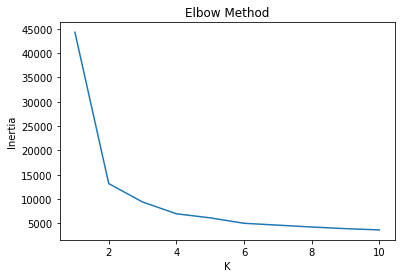

In [3]:
#preparing the dataset
xdf = df.drop(['Record_ID','Auction_ID','Bidder_ID','Class'],axis=1)
#making a list to store inertia for each k-means model
inertia = list()
klist = np.arange(1,11,1)
for k in klist:
    model = KMeans(n_clusters = k).fit(xdf)
    inertia.append(model.inertia_)
#plotting the k-inertia plot
plt.plot(klist, inertia)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [4]:
#a function for calculating purity
#I used sklearn here
from sklearn.metrics.cluster import contingency_matrix
def purityscore(truelabels, clusterlabels):
    #contingency matrix
    contmat = contingency_matrix(truelabels, clusterlabels)
    #purity
    purity = np.sum(np.amax(contmat, axis=0))/np.sum(contmat)
    return purity

In [6]:
kmeans = KMeans(n_clusters = 2).fit(xdf)

In [7]:
print('Purity: ', purityscore(df['Class'], kmeans.labels_))

Purity:  0.8932130991931656


In [8]:
#doing the same thing without sklearn library
tp = list()
for i in range(2):
    current_cluster = df.iloc[kmeans.labels_==i].reset_index(drop=True)
    ans = current_cluster.groupby('Class').count()['Record_ID']
    #the cluster belongs to the class with the most data points in that cluster
    tp.append(max(list(ans)))
purity = sum(tp)/df.shape[0]
print('Purity: ', purity)

Purity:  0.8932130991931656
